In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

In [2]:
def c_increment(n):
    c_inc = QuantumCircuit(n)
    controls = [x for x in range(n-1)]
    
    for p in range(n-1):
        c_inc.mcx(controls,controls[-1] + 1)
        controls.pop()
        
    c_inc.x(0)
    c_inc = c_inc.to_gate()
    c_inc.name = 'INC'
    c_inc = c_inc.control()
    return c_inc
    
def c_decrement(n):
    c_dec = QuantumCircuit(n)
    controls = [x for x in range(n-1)]
    c_dec.x(controls)
    
    for p in range(n-2):
        c_dec.mcx(controls,controls[-1] + 1)
        c_dec.x(controls[-1])
        controls.pop()
        
    c_dec.cx(0,1)
    c_dec = c_dec.to_gate()
    c_dec.name = 'DEC'
    c_dec = c_dec.control()
    return c_dec

/Users/brunochagas/opt/anaconda3/lib/python3.7/site-packages/qiskit/circuit/add_control.py:92: DeprecationWarning: The multi_control_toffoli_gate module is deprecated as of 0.13.0 and will be removed no earlier than 3 months after this release date. The multi-controlled Toffoli and the ``mct`` function can be found in x.py along with the X gates.
  import qiskit.extensions.standard.multi_control_toffoli_gate


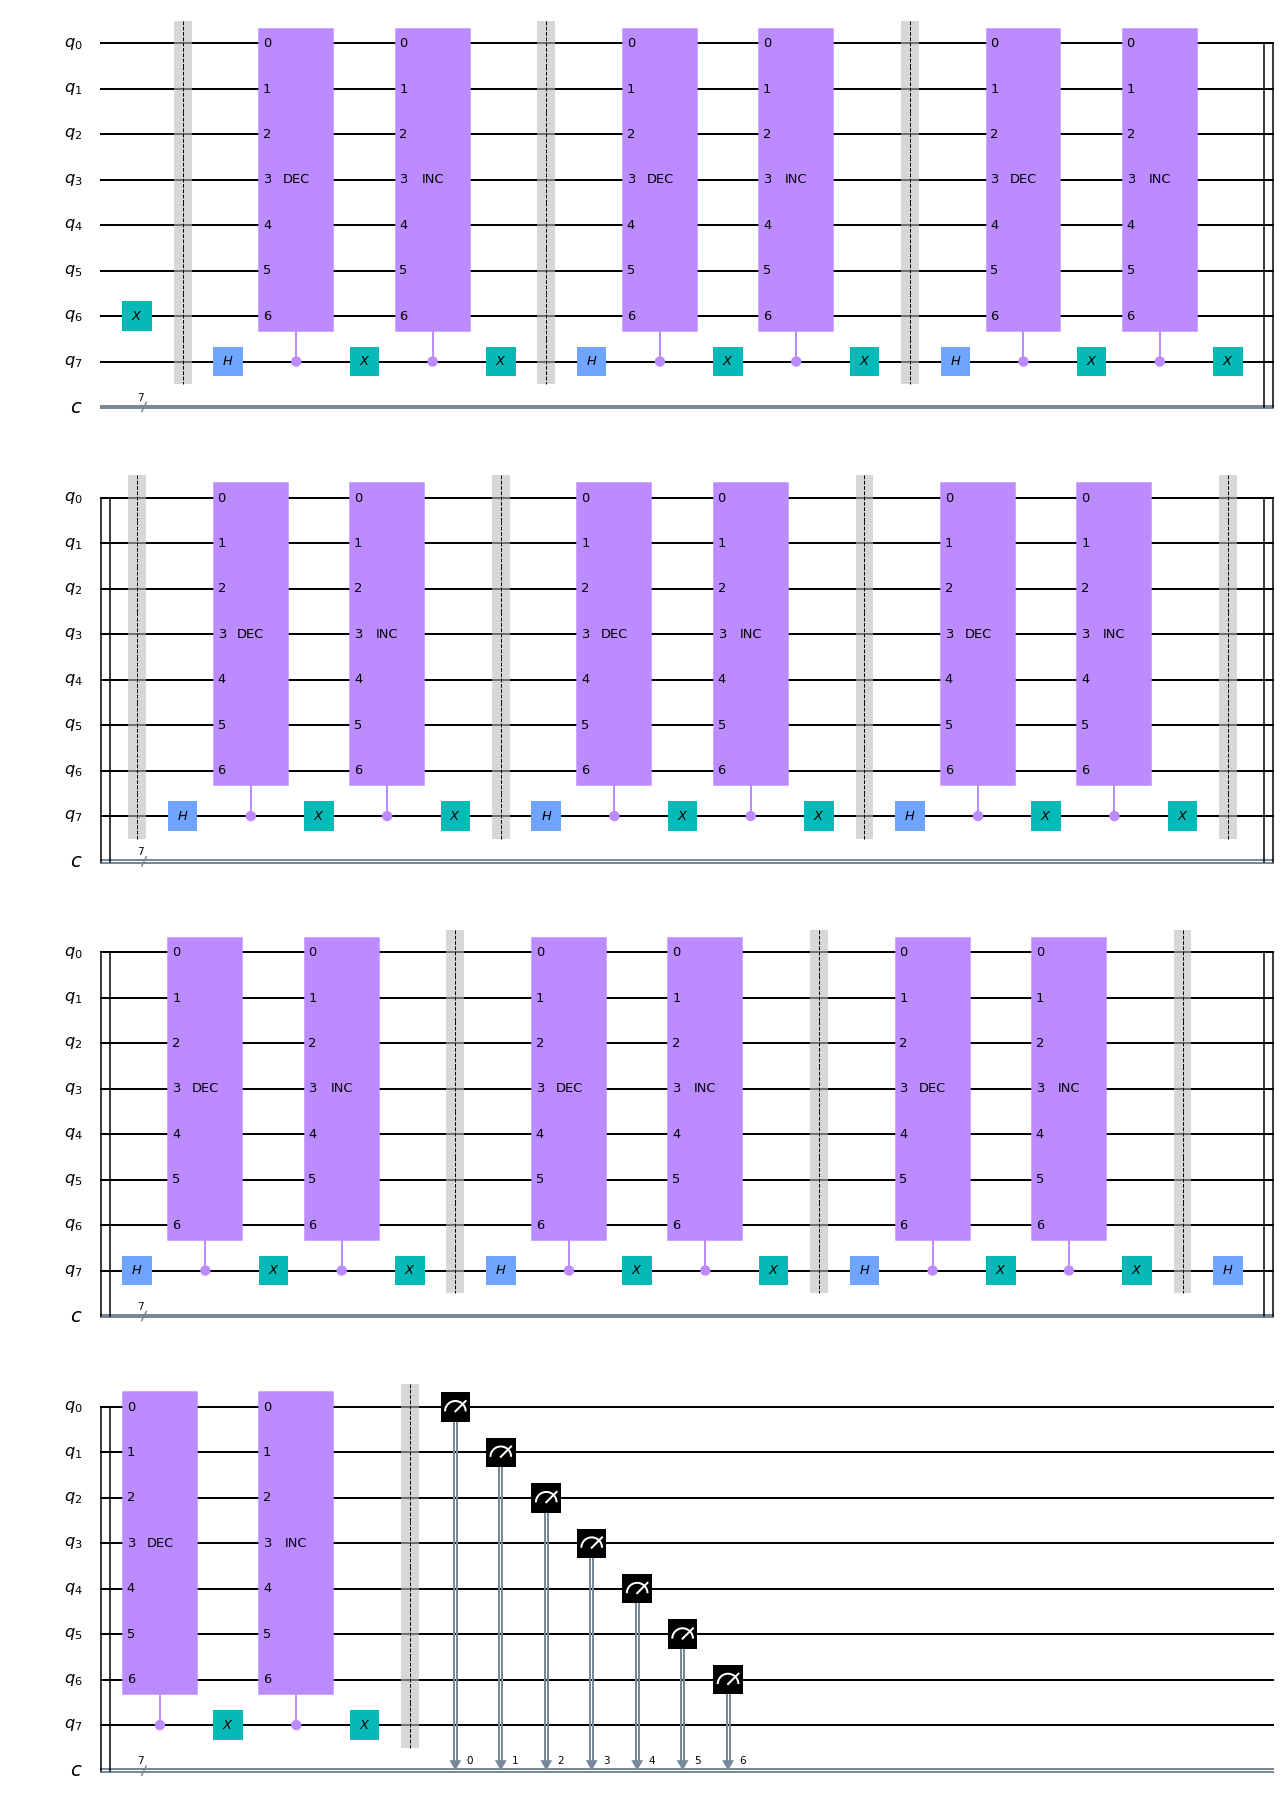

In [3]:
n = 7
steps = 10

qw_qc = QuantumCircuit(n+1,n)
u_inc = c_increment(n)
u_dec = c_decrement(n)

#--- Initial Condition
qw_qc.x(n-1)

qw_qc.barrier()
#--- Diffusion
for t in range(steps):
    qw_qc.h(n)
    qw_qc.append(u_dec, [n]+list(range(0, n)))
    qw_qc.x(n)
    qw_qc.append(u_inc, [n]+list(range(0, n)))
    qw_qc.x(n)
    qw_qc.barrier()

qw_qc.measure(range(n),range(n))
qw_qc.draw('mpl')

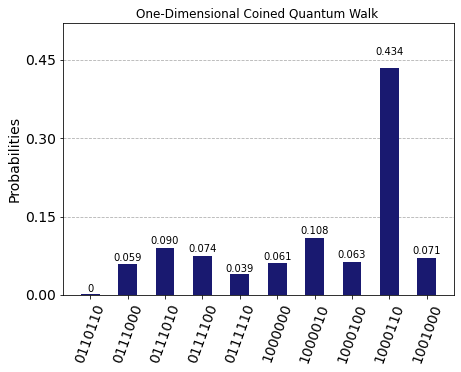

In [4]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qw_qc,backend=backend).result().get_counts()
plot_histogram(result,color='midnightblue', title="One-Dimensional Coined Quantum Walk ")